In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
# %matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # 경고문자 무시
# geopy.distance 좌표 간 거리 계산
# import reverse_geocode # 좌표 -> 목적지 -----> 오류
from geopy.geocoders import Nominatim # 좌표 -> 목적지(api 가입 X)

In [3]:
df_pairs = pd.read_csv('./pairs.csv', encoding='UTF-8')
# sample_submission = pd.read_csv('./test.csv', encoding='utf-8')
df_test = pd.read_csv('./test.csv', encoding='UTF-8')
df_train = pd.read_csv('./train.csv', encoding='UTF-8')

##### df_train 보기

In [4]:
print(df_train.shape)
df_train.head()

(1138812, 13)


,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb


##### df_pairs 보기

In [5]:
print(df_pairs.shape)
df_pairs.head()

(578907, 25)


,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


##### df_test 보기

In [6]:
print(df_test.shape)
print(df_test.info())

(5, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5 non-null      object 
 1   name        5 non-null      object 
 2   latitude    5 non-null      float64
 3   longitude   5 non-null      float64
 4   address     3 non-null      object 
 5   city        3 non-null      object 
 6   state       2 non-null      object 
 7   zip         2 non-null      float64
 8   country     5 non-null      object 
 9   url         1 non-null      object 
 10  phone       1 non-null      float64
 11  categories  5 non-null      object 
dtypes: float64(4), object(8)
memory usage: 608.0+ bytes
None


#### 어느 나라의 location이 가장 높은가
- 미국

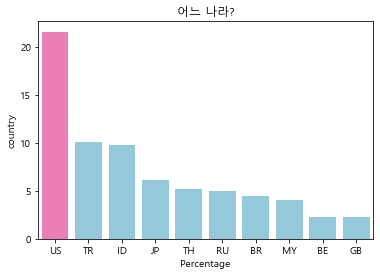

In [7]:
country = df_train['country'].value_counts()*100 / df_train['country'].value_counts().sum() # 비율로 보기
country = country.head(10) # 상위 10개까지만

plt.figure()
color = ['skyblue'] * len(country.index)
color[0] = 'hotpink'
sns.barplot(x=country.index, y=country.values, palette=color, saturation=0.7)
plt.xlabel('Percentage')
plt.ylabel('country')
plt.title('어느 나라?')
plt.show()


#### 미국 내 loaction이 높은 주?
- 캘리포니아

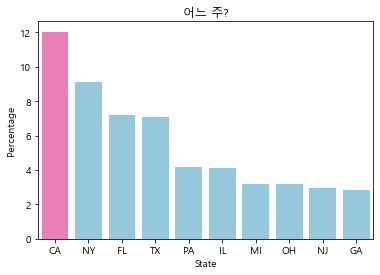

In [8]:
state = df_train[df_train['country']=='US']['state'].value_counts()*100 / df_train[df_train['country']=='US']['state'].value_counts().sum()
state = state.head(10)

plt.figure()
color=["skyblue"] * len(state.index)
color[0]="hotpink"
sns.barplot(x=state.index, y=state.values, palette=color, saturation=0.7)
plt.xlabel('State')
plt.ylabel('Percentage')
plt.title("어느 주?")
plt.show()

#### 어떤 카테고리?
- 주거용 건물(아파트/콘도)

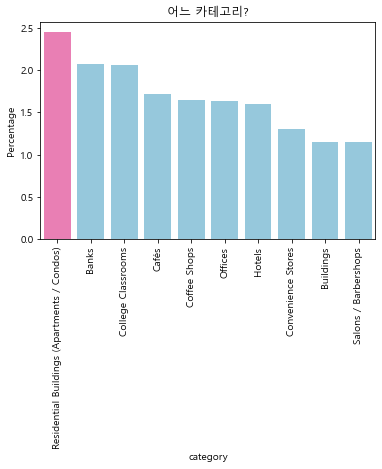

In [9]:
category = df_train['categories'].value_counts()*100 / df_train['categories'].value_counts().sum()
category = category.head(10)

plt.figure()
color = ["skyblue"] * len(category.index)
color[0] = "hotpink"
sns.barplot(x=category.index, y=category.values, palette=color, saturation=0.7)
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('Percentage')
plt.title("어느 카테고리?")
plt.show()

## 데이터 전처리

In [10]:
# 소문자로
def Str_lower(df : pd.DataFrame):
    for c in df.columns:
        df[c] = df[c].fillna('').astype(str).apply(lambda x:x.lower())

Str_lower(df_train)
Str_lower(df_pairs)
Str_lower(df_test)

In [11]:
# 빈 칸을 결측치로
def Replace_missing(df : pd.DataFrame):
    for c in df.columns:
        df[c] =  df[c].replace('', np.nan)

Replace_missing(df_train)
Replace_missing(df_pairs)
Replace_missing(df_test)

In [12]:
# object를 category로 형변환
def OtC(df : pd.DataFrame):
    for c in df.columns:
        if df[c].dtype == 'O':
            df[c] = df[c].astype('category')

OtC(df_train)
OtC(df_pairs)
OtC(df_test)

In [13]:
df_train['lat_long_coords'] = df_train['latitude'].astype(str) + ', ' + df_train['longitude'].astype(str)
df_pairs['lat_long_coords_1'] = df_pairs['latitude_1'].astype(str) + ', ' + df_pairs['longitude_1'].astype(str)
df_pairs['lat_long_coords_2'] = df_pairs['latitude_2'].astype(str) + ', ' + df_pairs['longitude_2'].astype(str)

In [174]:
# 장소(좌표)별 국가
def geo_reverse_country(list): 
    geolocoder = Nominatim(user_agent = 'World', timeout=None)
    country_list=[]
    for i in list:
        address = geolocoder.reverse(i, zoom=1)
        country_list.append(address)
    # return country_list
        print(address)

# df_train['country_code'] = geo_reverse_country(list(df_train['lat_long_coords'])[:3])[0]
# # df_train['city_code'] =geocoding_reverse(list(df_train['lat_long_coords'])[:3])[1]

# df_pairs['country_code_1'] = geo_reverse_country(list(df_pairs['lat_long_coords_1'])[:3])[0]
# # df_pairs['city_code_1'] = geocoding_reverse(geo_reverse_countrylist(df_pairs['lat_long_coords_1'])[:3])[1]

# df_pairs['country_code_2'] = geo_reverse_country(list(df_pairs['lat_long_coords_2'])[:3])[0]
# # df_pairs['city_code_2'] = geocoding_reverse(list(df_pairs['lat_long_coords_2'])[:3])[1]


In [175]:
geo_reverse_country(list(df_train['lat_long_coords'])[:3])

België / Belgique / Belgien
Brasil
ประเทศไทย


In [160]:
# def geo_reverse_city(abc : list): 

#     city_list=[]
#     for i in abc:
#         geolocoder = Nominatim(user_agent = 'World', timeout=None)
#         address = geolocoder.reverse(zoom=5, query=i)
#         city_list.append(address)
#     return city_list

In [29]:
# # 장소(좌표)별 국가, 도시 이름
# def geocoding_reverse(list): 
#     geolocoder = Nominatim(user_agent = 'World', timeout=None)
#     addr_list=[]
#     country_list=[]
#     city_list=[]
#     for i in list:
#         address = geolocoder.reverse(i)
#         addr_list.append(address)
#         country_list=addr_list[0][0].split('/')[-1]
#         city_list=addr_list[0][0].split('/')[-2]
#     return country_list, city_list

# df_train['country_code'] = geocoding_reverse(list(df_train['lat_long_coords'])[:3])[0]
# df_train['city_code'] =geocoding_reverse(list(df_train['lat_long_coords'])[:3])[1]

# df_pairs['country_code_1'] = geocoding_reverse(list(df_pairs['lat_long_coords_1'])[:3])[0]
# df_pairs['city_code_1'] = geocoding_reverse(list(df_pairs['lat_long_coords_1'])[:3])[1]

# df_pairs['country_code_2'] = geocoding_reverse(list(df_pairs['lat_long_coords_2'])[:3])[0]
# df_pairs['city_code_2'] = geocoding_reverse(list(df_pairs['lat_long_coords_2'])[:3])[1]


In [ ]:
OtC(df_train)
OtC(df_pairs)

Str_lower(df_train)
Str_lower(df_pairs)

### 분석

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.utils import all_estimators

In [ ]:
df_pairs['match']= df_pairs['match'].cat.codes
df_pairs['categories_1']= df_pairs['categories_1'].cat.codes
df_pairs['categories_2']= df_pairs['categories_2'].cat.codes

X = df_pairs[['latitude_1', 'longitude_1', 
'latitude_2', 'longitude_2', 'categories_1', 'categories_2', 'match']]

X['latitude_1']= X['latitude_1'].astype(np.float)
X['longitude_1']= X['longitude_1'].astype(np.float)
X['latitude_2']= X['latitude_2'].astype(np.float)
X['longitude_2']= X['longitude_2'].astype(np.float)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(
    df_train, X, test_size=0.2, random_state=42)

In [ ]:
# 적합한 모델 찾기
scores_list=[]
models = all_estimators(type_filter='classifier')

for name, model in models:
    try:
        # 모델 객체를 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        model_score = md.score(test_X, test_y)
        scores_list.append((name, np.round(model_score, 4)))
    except:
        pass

scores_list

In [ ]:
train_X = np.array(train_X)
train_y = np.array(train_y)

# 모델 생성
forest_model = RandomForestClassifier(max_depth=5, oob_score=True)
forest_model.fit(train_X, train_y)
# 모델 평가
print('train score : ', forest_model.score(train_X, train_y))
print('test score : ', forest_model.score(test_X, test_y))
print('oob_score_ : ', forest_model.oob_score_)

In [ ]:
# 교차 검증 후 평가점수 확인
result = cross_validate(forest_model, df_train, X, return_train_score=True, cv=3)
print(result)
print(result['test_score'].mean())